In [1]:
import numpy as np
import matplotlib.pyplot as plt
from power import *

In [2]:
X = 0.2

R = list(np.arange(0.001, 2.001, 0.001))

V0 = complex(1, 0)

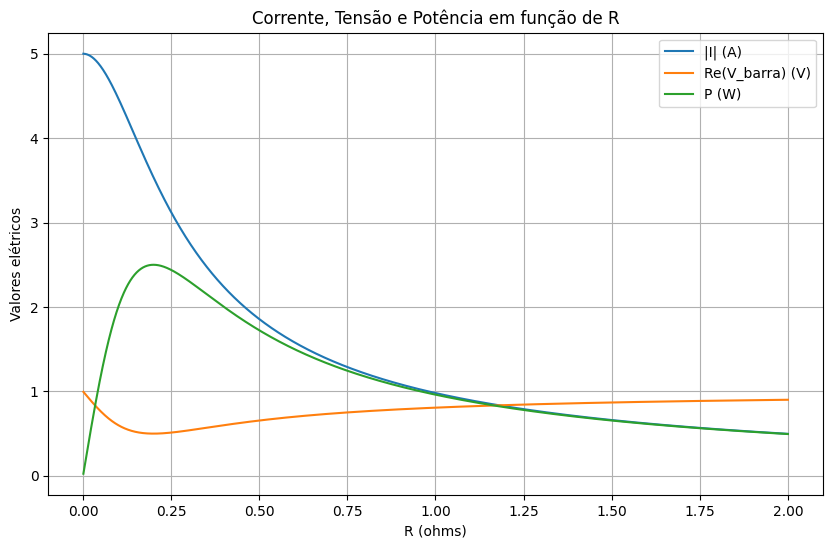

In [3]:
I_abs = []
V_barra = []
P = []

for r in R:
    Z = complex(r, X)
    I_complex = V0 / Z
    Vb = V0 - I_complex * X  # tensão na barra

    I_abs.append(np.abs(I_complex))
    V_barra.append(Vb)
    
    S = V0 * I_complex.conjugate()
    P.append(S.real)

# Convertendo V_barra para array de números complexos
V_barra = np.array(V_barra)

# Plot
plt.figure(figsize=(10,6))
plt.plot(R, I_abs, label='|I| (A)')
plt.plot(R, V_barra.real, label='Re(V_barra) (V)')
plt.plot(R, P, label='P (W)')
plt.xlabel('R (ohms)')
plt.ylabel('Valores elétricos')
plt.title('Corrente, Tensão e Potência em função de R')
plt.legend()
plt.grid(True)
plt.show()
    
    

In [17]:
net = Network()

buses = [
    Bus(net, id=1, bus_type='Slack'),
    Bus(net, id=2, bus_type='PQ')
]

lines = [
    Line(id=1, from_bus=buses[0], to_bus=buses[1], r=0, x=0.2)

]

generators = [
    Generator(id=1, bus=buses[0])
]

loads = [
    Load(id=1, bus=buses[1], p_input=3)
]

solver = AC_PF(net)

P, Q = solver.pq_calc(theta=solver.theta_0, V=solver.V_0)

J = solver.jacobian( theta=solver.theta_0, V=solver.V_0, P=P, Q=Q)
print(J)

detJ =  np.linalg.det(J)
print(detJ)

[[ 1.  0.  0.  0.]
 [-5.  5.  0.  0.]
 [ 0.  0.  1.  0.]
 [-0.  0. -5.  5.]]
24.999999999999996
